<a href="https://colab.research.google.com/github/aomidvar/alibabainpersia/blob/master/WeightedScoreMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pymcdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 3.0 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/pymcdm/weights.py:235: RuntimeWarning: divide by zero encountered in divide
  values[j] = np.sum(np.abs(matrix[j, i] - matrix[:, i]) / (2 * n ** 2 * (np.sum(matrix[:, i]) / n)))
/usr/local/lib/python3.10/dist-packages/pymcdm/weights.py:235: RuntimeWarning: invalid value encountered in divide
  values[j] = np.sum(np.abs(matrix[j, i] - matrix[:, i]) / (2 * n ** 2 * (np.sum(matrix[:, i]) / n)))


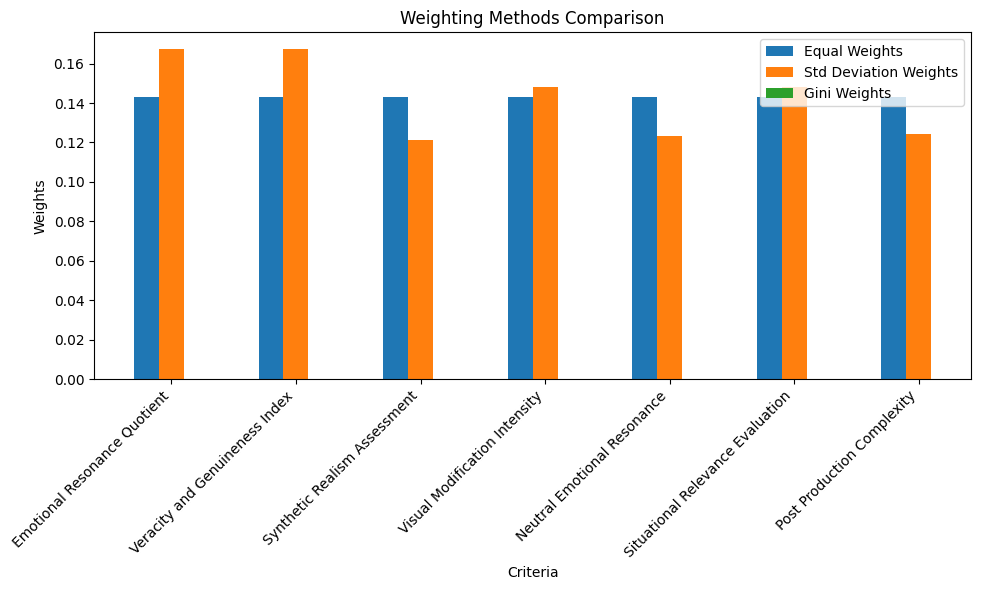

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pymcdm import weights as w

# Define the criteria and their information
criteria = [
    {
        "Criteria Name": "Emotional Resonance Quotient",
        "Weight": 15,
        "Description": "This category evaluates the imagery's capacity to evoke emotions.",
        "Score Labels": [-10, -5, 0, 5, 10]
    },
    {
        "Criteria Name": "Veracity and Genuineness Index",
        "Weight": 15,
        "Description": "This category measures the authenticity of the content.",
        "Score Labels": [-10, -5, 0, 5, 10]
    },
    {
        "Criteria Name": "Synthetic Realism Assessment",
        "Weight": 10,
        "Description": "This category evaluates the degree of synthetic realism in the imagery.",
        "Score Labels": [-10, -5, -3, 1, 5]
    },
    {
        "Criteria Name": "Visual Modification Intensity",
        "Weight": 15,
        "Description": "This category assesses the extent of visual modifications applied to the imagery.",
        "Score Labels": [-10, -7, -5, -3, 5]
    },
    {
        "Criteria Name": "Neutral Emotional Resonance",
        "Weight": 10,
        "Description": "This category measures neutral emotions usage.",
        "Score Labels": [-7, -5, -3, 3, 7]
    },
    {
        "Criteria Name": "Situational Relevance Evaluation",
        "Weight": 20,
        "Description": "This category assesses how well the imagery aligns with the context in which it is presented.",
        "Score Labels": [-10, -7, -3, 3, 7]
    },
    {
        "Criteria Name": "Post Production Complexity",
        "Weight": 15,
        "Description": "This category gauges the complexity of post-production editing applied to the imagery.",
        "Score Labels": [-10, -6, -3, 1, 5]
    }
]

# Create a DataFrame from the criteria data
df = pd.DataFrame(criteria)

# Define the scores for each criterion (example scores for each criterion)
scores = {
    "Emotional Resonance Quotient": [10, -5, 0, 5, -10],
    "Veracity and Genuineness Index": [10, 5, 0, -5, -10],
    "Synthetic Realism Assessment": [-10, -5, -3, 1, 5],
    "Visual Modification Intensity": [5, -7, -5, -10, 5],
    "Neutral Emotional Resonance": [7, -5, -3, 3, -7],
    "Situational Relevance Evaluation": [7, -7, -3, 3, -10],
    "Post Production Complexity": [5, -6, -3, 1, -10]
}

# Create a matrix from the scores dictionary
matrix = np.array([scores[criterion] for criterion in df["Criteria Name"]]).T

# Calculate weights using the specified methods
equal_weights = w.equal_weights(matrix)
std_dev_weights = w.standard_deviation_weights(matrix)
gini_weights = w.gini_weights(matrix)

# Add the calculated weights to the DataFrame
df["Equal Weights"] = equal_weights
df["Std Deviation Weights"] = std_dev_weights
df["Gini Weights"] = gini_weights

# Plot the calculated weights
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(df))

ax.bar(x - 0.2, df["Equal Weights"], 0.2, label='Equal Weights')
ax.bar(x, df["Std Deviation Weights"], 0.2, label='Std Deviation Weights')
ax.bar(x + 0.2, df["Gini Weights"], 0.2, label='Gini Weights')

ax.set_xlabel('Criteria')
ax.set_ylabel('Weights')
ax.set_title('Weighting Methods Comparison')
ax.set_xticks(x)
ax.set_xticklabels(df["Criteria Name"], rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/pymcdm/weights.py:235: RuntimeWarning: divide by zero encountered in divide
  values[j] = np.sum(np.abs(matrix[j, i] - matrix[:, i]) / (2 * n ** 2 * (np.sum(matrix[:, i]) / n)))
/usr/local/lib/python3.10/dist-packages/pymcdm/weights.py:235: RuntimeWarning: invalid value encountered in divide
  values[j] = np.sum(np.abs(matrix[j, i] - matrix[:, i]) / (2 * n ** 2 * (np.sum(matrix[:, i]) / n)))
/usr/local/lib/python3.10/dist-packages/pymcdm/normalizations.py:82: RuntimeWarning: divide by zero encountered in divide
  return x / np.sum(x)
/usr/local/lib/python3.10/dist-packages/pymcdm/normalizations.py:82: RuntimeWarning: invalid value encountered in divide
  return x / np.sum(x)
/usr/local/lib/python3.10/dist-packages/pymcdm/weights.py:71: RuntimeWarning: invalid value encountered in log
  entropies[i] = -np.sum(col * np.log(col))


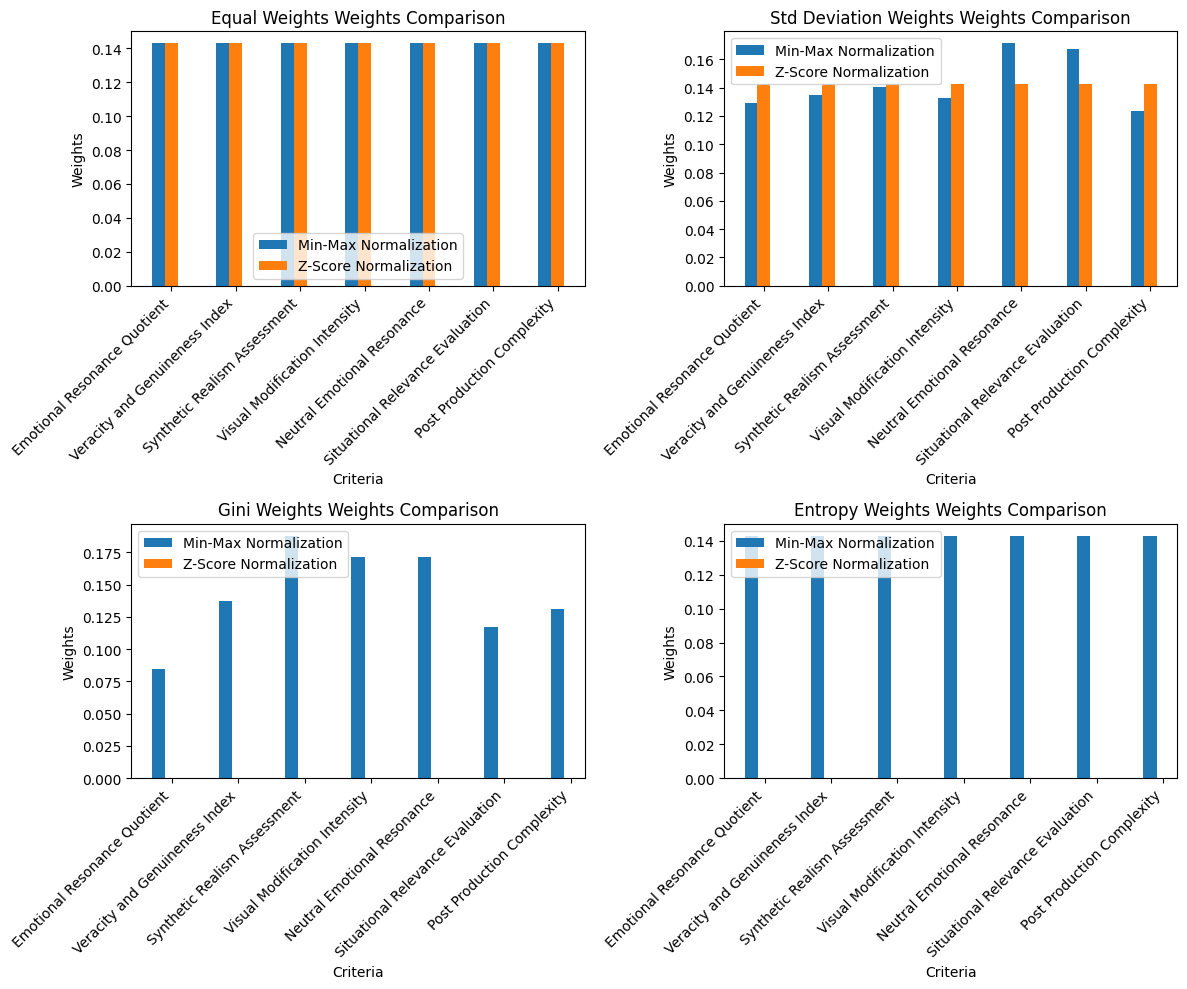

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pymcdm import weights as w
from scipy.stats import zscore

# Define the criteria and their information
criteria = [
    {
        "Criteria Name": "Emotional Resonance Quotient",
        "Weight": 15,
        "Description": "This category evaluates the imagery's capacity to evoke emotions.",
        "Score Labels": [-10, -5, 0, 5, 10]
    },
    {
        "Criteria Name": "Veracity and Genuineness Index",
        "Weight": 15,
        "Description": "This category measures the authenticity of the content.",
        "Score Labels": [-10, -5, 0, 5, 10]
    },
    {
        "Criteria Name": "Synthetic Realism Assessment",
        "Weight": 10,
        "Description": "This category evaluates the degree of synthetic realism in the imagery.",
        "Score Labels": [-10, -5, -3, 1, 5]
    },
    {
        "Criteria Name": "Visual Modification Intensity",
        "Weight": 15,
        "Description": "This category assesses the extent of visual modifications applied to the imagery.",
        "Score Labels": [-10, -7, -5, -3, 5]
    },
    {
        "Criteria Name": "Neutral Emotional Resonance",
        "Weight": 10,
        "Description": "This category measures neutral emotions usage.",
        "Score Labels": [-7, -5, -3, 3, 7]
    },
    {
        "Criteria Name": "Situational Relevance Evaluation",
        "Weight": 20,
        "Description": "This category assesses how well the imagery aligns with the context in which it is presented.",
        "Score Labels": [-10, -7, -3, 3, 7]
    },
    {
        "Criteria Name": "Post Production Complexity",
        "Weight": 15,
        "Description": "This category gauges the complexity of post-production editing applied to the imagery.",
        "Score Labels": [-10, -6, -3, 1, 5]
    }
]

# Create a DataFrame from the criteria data
df = pd.DataFrame(criteria)

# Generate random scores based on a Likert scale
np.random.seed(0)
scores = {
    "Emotional Resonance Quotient": np.random.choice([-10, -5, 0, 5, 10], 5),
    "Veracity and Genuineness Index": np.random.choice([-10, -5, 0, 5, 10], 5),
    "Synthetic Realism Assessment": np.random.choice([-10, -5, -3, 1, 5], 5),
    "Visual Modification Intensity": np.random.choice([-10, -7, -5, -3, 5], 5),
    "Neutral Emotional Resonance": np.random.choice([-7, -5, -3, 3, 7], 5),
    "Situational Relevance Evaluation": np.random.choice([-10, -7, -3, 3, 7], 5),
    "Post Production Complexity": np.random.choice([-10, -6, -3, 1, 5], 5)
}

# Create a DataFrame from the scores
scores_df = pd.DataFrame(scores)

# Normalize scores using min-max scaling
min_max_normalized_scores = (scores_df - scores_df.min()) / (scores_df.max() - scores_df.min())

# Normalize scores using z-score normalization
zscore_normalized_scores = scores_df.apply(zscore)

# Calculate weights using the specified methods for each set of normalized scores
methods = {
    "Equal Weights": w.equal_weights,
    "Std Deviation Weights": w.standard_deviation_weights,
    "Gini Weights": w.gini_weights,
    "Entropy Weights": w.entropy_weights
}

weight_results = {}

for method_name, method in methods.items():
    weights_min_max = method(min_max_normalized_scores.values)
    weights_zscore = method(zscore_normalized_scores.values)
    weight_results[method_name] = {
        "Min-Max Normalization": weights_min_max,
        "Z-Score Normalization": weights_zscore
    }

# Plot the calculated weights for each method
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.ravel()
x = np.arange(len(df))

for i, (method_name, weights) in enumerate(weight_results.items()):
    axs[i].bar(x - 0.2, weights["Min-Max Normalization"], 0.2, label='Min-Max Normalization')
    axs[i].bar(x, weights["Z-Score Normalization"], 0.2, label='Z-Score Normalization')

    axs[i].set_xlabel('Criteria')
    axs[i].set_ylabel('Weights')
    axs[i].set_title(f'{method_name} Weights Comparison')
    axs[i].set_xticks(x)
    axs[i].set_xticklabels(df["Criteria Name"], rotation=45, ha="right")
    axs[i].legend()

plt.tight_layout()
plt.show()